# 1D constant coefficient advection

We solve the 1-dimensional advection equation with constant coefficient and periodic boundary conditions

$$
\begin{align}
    & \frac{\partial}{\partial t} f(t,x) - v \frac{\partial}{\partial t} f(t,x) = 0 \\[3mm]
    & f(t,a) = f(t,b) \qquad \forall \; t\in [0,T]
\end{align}
$$

See the [fifth exercise sheet](http://www-m16.ma.tum.de/foswiki/pub/M16/Allgemeines/CompPlasmaPhys22/exercise05.pdf) for details.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def Euler_upwind(dt, h, v, f_old):
    """
    Updates f according to the Euler upwind scheme

    Parameters:
        dt    : time-step size
        h     : grid spacing
        v     : parameter v from the equation
        f_old : array of values of f on the grid
    """
    v_minus = min(0, v)
    v_plus  = max(0, v)
    
    sz = np.shape(f_old)
    l = len(f_old)
    
    f_new = np.empty(sz)
    f_shifted_left = np.empty(sz)
    f_shifted_right = np.empty(sz)
    
    f_shifted_left = np.concatenate((f_old[1:], f_old[:1])) # i + 1
    f_shifted_right = np.concatenate((f_old[l-1:], f_old[:l-1])) # i - 1
    
    
    
    f_new = f_old - (dt/h) * (v_minus * (f_shifted_left - f_old) +  v_plus * (f_old - f_shifted_right))  
       
    #for i in range(sz[0]):
        #f_new[i] = f_old[i] - (dt/h) * (v_minus * (f_old[i+1] - f_old[i]) + v_plus * (f_old[i] - f_old[i-1]))
    
    return f_new

def Lax_Wendroff(dt, h, v, f_old):
    """
    Updates f according to the Lax-Wendroff scheme

    Parameters:
        dt    : time-step size
        h     : grid spacing
        v     : parameter v from the equation
        f_old : array of values of f on the grid
    """
    
    sz = np.shape(f_old)
    l = len(f_old)
    
    f_new = np.empty(sz)
    f_shifted_left = np.empty(sz)
    f_shifted_right = np.empty(sz)
    
    f_shifted_left = np.concatenate((f_old[1:], f_old[:1])) # i + 1
    f_shifted_right = np.concatenate((f_old[l-1:], f_old[:l-1])) # i - 1
    
    comb = v * dt / h
    
    f_new = f_old - comb / 2 * (f_shifted_left - f_shifted_right) + comb * comb / 2 * (f_shifted_left - 2 * f_old + f_shifted_right)
    #f_new = 

    return f_new

In [17]:
# Set the parameters
#v = -2
v  = 2
a  = 0
b  = 1
dt = 0.001 # timestep is reduced to satisfy stability conditions: abs(v * dt / h) <= 1
T  = 0.9

N_timesteps = round(T/dt)
time_vec    = np.arange(0, T, dt)

N = 100

# generate the grid

Omega = np.linspace(a, b, N+1)[:-1]
h     = Omega[1] - Omega[0]


sigma  = 0.05
f0     = lambda x : 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(- (x - (a+b)/2)**2 / (2 * sigma**2))
f_full = lambda x,t: 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(- ((x  - v*t) % b - (a+b)/2)**2 / (2 * sigma**2))

f0_vec = f0(Omega)


#f_full_vec = f_full(Omega, 0)
#print(f_full_vec)
#print(np.shape(Omega))





### Euler-upwind scheme

$$
f_i^{n+1} = f_i^n - \frac{\Delta t}{h} \left( v_- (f_{i+1}^n - f_i^n) + v_+ (f_i^n - f_{i-1}^n) \right)
$$

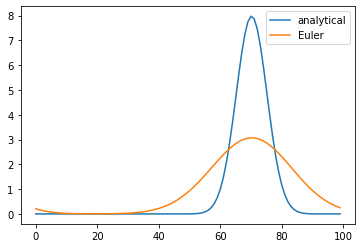

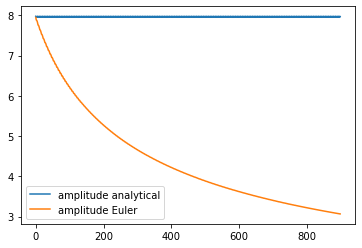

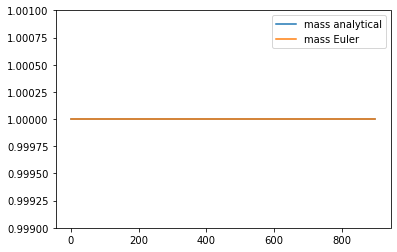

In [18]:
f_euler = f0_vec #initial conditions

amplitude_Euler = np.empty(N_timesteps)
amplitude_anal = np.empty(N_timesteps)
mass_Euler = np.empty(N_timesteps)
mass_anal = np.empty(N_timesteps)

for k in range(N_timesteps):
    f_euler    = Euler_upwind(dt, h, v, f_euler)
    f_full_vec = f_full(Omega, k * dt)
    amplitude_anal[k] = max(f_full_vec)
    amplitude_Euler[k] = max(f_euler)
    mass_Euler[k] = np.sum(f_euler) / N
    mass_anal[k] = np.sum(f_full_vec) / N
    
    
    if k == (N_timesteps - 1):
        plt.figure()
        plt.plot(f_full_vec , label='analytical')
        plt.plot(f_euler  , label='Euler')
        plt.legend()
        plt.show()
    
plt.figure()
plt.plot(amplitude_anal, label = 'amplitude analytical')
plt.plot(amplitude_Euler, label = 'amplitude Euler')
plt.legend()
plt.show()


plt.figure()
plt.plot(mass_anal, label = 'mass analytical')
plt.plot(mass_Euler, label = 'mass Euler')
plt.legend()
plt.ylim([0.999, 1.001])
plt.show()

### Lax-Wendroff scheme

$$
f_i^{n+1} = f_i^n - \frac{v\Delta t}{2h} (f_{i+1}^n - f_{i-1}^n) + \frac{v^2 \Delta t^2}{2h^2} (f_{i+1}^n - 2f_i^n + f_{i-1}^n)
$$

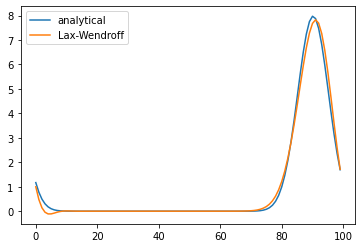

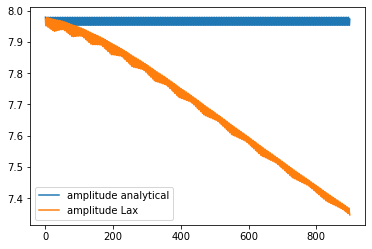

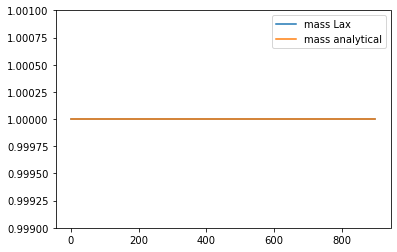

In [19]:
f_lax = f0_vec

amplitude_Lax = np.empty(N_timesteps)
mass_anal = np.empty(N_timesteps)
mass_Lax = np.empty(N_timesteps)
mass_anal = np.empty(N_timesteps)

for k in range(N_timesteps):
    f_lax      = Lax_Wendroff(dt, h, v, f_lax)
    f_full_vec = f_full(Omega, k * dt)
    amplitude_Lax[k] = max(f_lax)
    amplitude_anal[k] = max(f_full_vec)
    mass_Lax[k] = np.sum(f_lax) / N
    mass_anal[k] = np.sum(f_full_vec) / N

    if k == (299):
        plt.figure()
        plt.plot(f_full_vec , label='analytical')
        plt.plot(f_lax  , label='Lax-Wendroff')
        plt.legend()
        plt.show()

plt.figure()
plt.plot(amplitude_anal, label = 'amplitude analytical')
plt.plot(amplitude_Lax, label = 'amplitude Lax')
plt.legend()
plt.show()


plt.figure()
plt.plot(mass_Lax, label = 'mass Lax')
plt.plot(mass_anal, label = 'mass analytical')
plt.legend()
plt.ylim([0.999, 1.001])
plt.show()

Comments to the worksheet.

For the velocity, timestep, and spatial step given in the worksheet, the scheme is not stable (and therefore, not convergent).
The timestep has been changed to satisfy stability conditions: abs(v * dt / h) <= 1. The conditions can be obtained using the von Neumann stability analysis.
If the scheme is stable for v = 2, then, according to the stability condition, it is also stable for a velocity v = -2.

Mass is conserved with high precision for both methods. It corresponds to my expectations.
For example, for one iteration of Euler scheme it holds:
f_new = f_old - (dt/h) * (v_minus * (f_shifted_left - f_old) +  v_plus * (f_old - f_shifted_right))
If we integrate f_new over the domain, we will see that the additional parts (integrals of [f_shifted_left - f_old ] and [f_old - f_shifted_right]) are equal to zero (as f_shifted are just shifts of f_old).
Same holds true for the Lax scheme, which leads to mass conservation over time.

The maximum amplitudes of the solutions decrease over time, which doesn't match the analytical solution. However, the solutions obtained are still viable, as the position of a wave is calculated with high precision. In addition, the Lax scheme gives much less amplitude loss, compared to the Euler scheme.